# Introduction
This notebook implements a Convolutional Neural Network (CNN) for image classification.

## Importing Required Libraries
The necessary libraries such as TensorFlow, Keras, and NumPy are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
import cv2
import pathlib

2025-03-04 17:46:21.341177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing
Loading and preprocessing all the images to make them suitable for testing.

In [2]:
path=pathlib.Path.cwd()
path

PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning')

In [3]:
p=list(path.glob("archive"))
path=pathlib.Path(p[0])
path

PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning/archive')

In [4]:
list(path.glob("Testing/glioma/*.jpg"))[:5]

[PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning/archive/Testing/glioma/Te-gl_0284.jpg'),
 PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning/archive/Testing/glioma/Te-gl_0290.jpg'),
 PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning/archive/Testing/glioma/Te-gl_0247.jpg'),
 PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning/archive/Testing/glioma/Te-gl_0253.jpg'),
 PosixPath('/Users/abrarmirza/Downloads/Data_science/Deep_Learning/archive/Testing/glioma/Te-gl_0086.jpg')]

In [5]:
X_dict={
    "glioma":list(path.glob("Testing/glioma/*.jpg")),
    "meningioma":list(path.glob("Testing/meningioma/*.jpg")),
    "notumor":list(path.glob("Testing/notumor/*.jpg")),
    "pituitary":list(path.glob("Testing/pituitary/*.jpg"))
}

In [6]:
Y_dict={
    "glioma":0,
    "meningioma":1,
    "notumor":2,
    "pituitary":3
}

In [7]:
x = []
y = []
k=[]
for names, image in X_dict.items():
    for img in image:
        a = plt.imread(str(img))
        if len(a.shape) == 2:
            a = cv2.cvtColor(a, cv2.COLOR_GRAY2RGB)
        if len(a.shape) == 3 and a.shape[2]==4:
            a = cv2.cvtColor(a, cv2.COLOR_RGBA2RGB)
        a = cv2.resize(a, (200, 200))

        if a.shape == (200, 200, 3):
            x.append(a)
            y.append(Y_dict[names])
        else:
            k.append(a)
x = np.array(x)
y = np.array(y)

In [8]:
k

[]

In [9]:
np.unique(y)

array([0, 1, 2, 3])

In [10]:
x.shape

(1311, 200, 200, 3)

In [11]:
x=x/255

## Testing with New Data
Loading the saved model and using it for predictions.

In [12]:
model=keras.models.load_model("Brain_Tumour.keras")

In [13]:
model.evaluate(x,y)

41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 542ms/step - accuracy: 0.9403 - loss: 0.2709


[0.18582403659820557, 0.9656750559806824]

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
pre=model.predict(x)

41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 550ms/step


In [16]:
pre=[np.argmax(i) for i in pre]

In [17]:
pre=np.array(pre)

In [18]:
print(classification_report(y,pre))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       300
           1       0.96      0.92      0.94       306
           2       0.98      1.00      0.99       405
           3       0.93      0.99      0.96       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



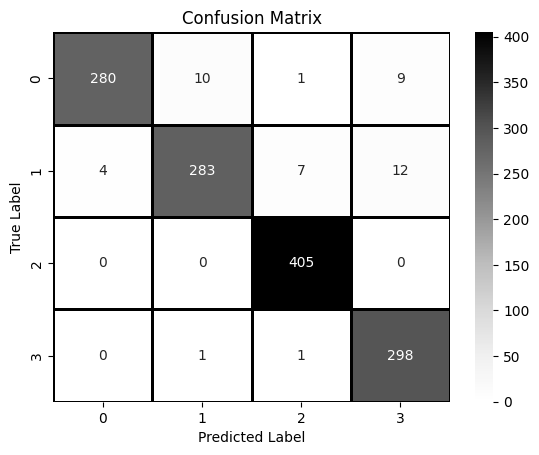

In [19]:
cm=confusion_matrix(y,pre)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greys", linewidths=1, linecolor="black", cbar=True, vmin=0, vmax=np.max(cm))
plt.rcParams["figure.figsize"]=(6,5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
a=plt.imread("images/glioma.jpg")

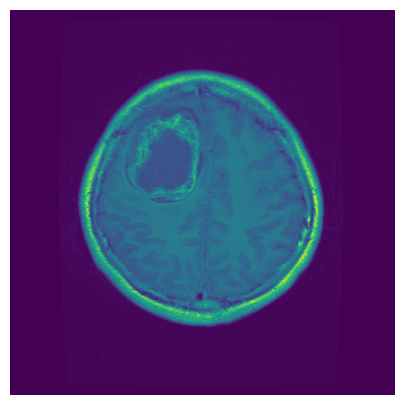

In [21]:
plt.imshow(a)
plt.axis(False)
plt.show()

In [22]:
a.shape

(512, 512)

In [23]:
a=cv2.cvtColor(a,cv2.COLOR_GRAY2RGB)

In [24]:
a.shape

(512, 512, 3)

In [25]:
a=cv2.resize(a,(200,200))

In [26]:
a.shape

(200, 200, 3)

In [27]:
a=a/255

In [28]:
a=a.reshape(1,200,200,3)

In [29]:
list(Y_dict.items())[np.argmax(model.predict(a))][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'glioma'

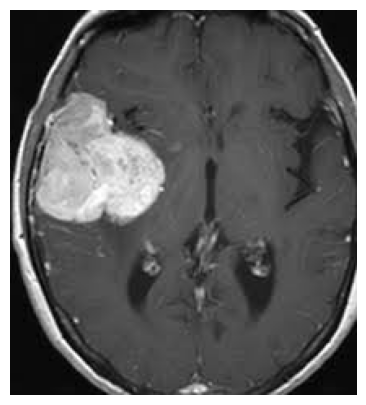

In [30]:
a=plt.imread("images/meningioma.jpg")
plt.imshow(a)
plt.axis(False)
plt.show()

In [31]:
a.shape

(237, 213, 3)

In [32]:
a=cv2.resize(a,(200,200))
a.shape

(200, 200, 3)

In [33]:
a=a/255
a=a.reshape(1,200,200,3)

In [34]:
list(Y_dict.items())[np.argmax(model.predict(a))][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'meningioma'

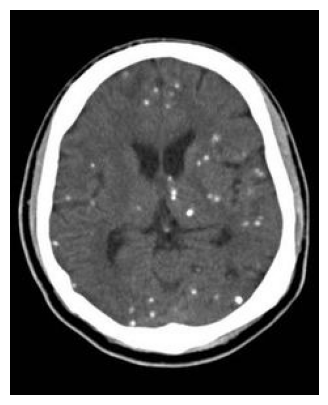

In [35]:
a=plt.imread("images/notumor.jpg")
plt.imshow(a)
plt.axis(False)
plt.show()

In [36]:
a.shape

(295, 236, 3)

In [37]:
a=cv2.resize(a,(200,200))
a.shape

(200, 200, 3)

In [38]:
a=a/255
a=a.reshape(1,200,200,3)

In [39]:
list(Y_dict.items())[np.argmax(model.predict(a))][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'notumor'

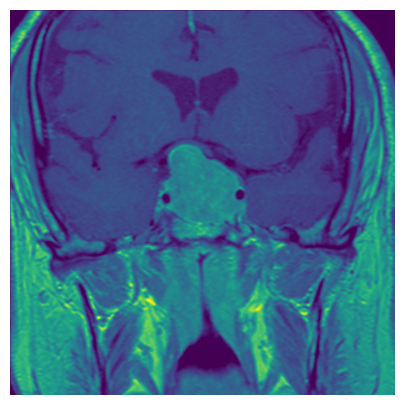

In [40]:
a=plt.imread("images/pituitary.jpg")
plt.imshow(a)
plt.axis(False)
plt.show()

In [41]:
a.shape

(630, 630)

In [42]:
a=cv2.cvtColor(a,cv2.COLOR_GRAY2RGB)
a=cv2.resize(a,(200,200))
a.shape

(200, 200, 3)

In [43]:
a=a/255
a=a.reshape(1,200,200,3)

In [44]:
list(Y_dict.items())[np.argmax(model.predict(a))][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'pituitary'